**Synthetic Data to Explore Transcriptional Regulation of Differentially Expressed Genes in Ovarian Cancer**

HGSOC example

Authors: Zhang Shuo, Kumar Selerajoo


Step1:
Import the dataset and packages to colab

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
import pandas as pd

gene = pd.read_csv('/content/drive/MyDrive/new_gene.csv')

In [ ]:
gene

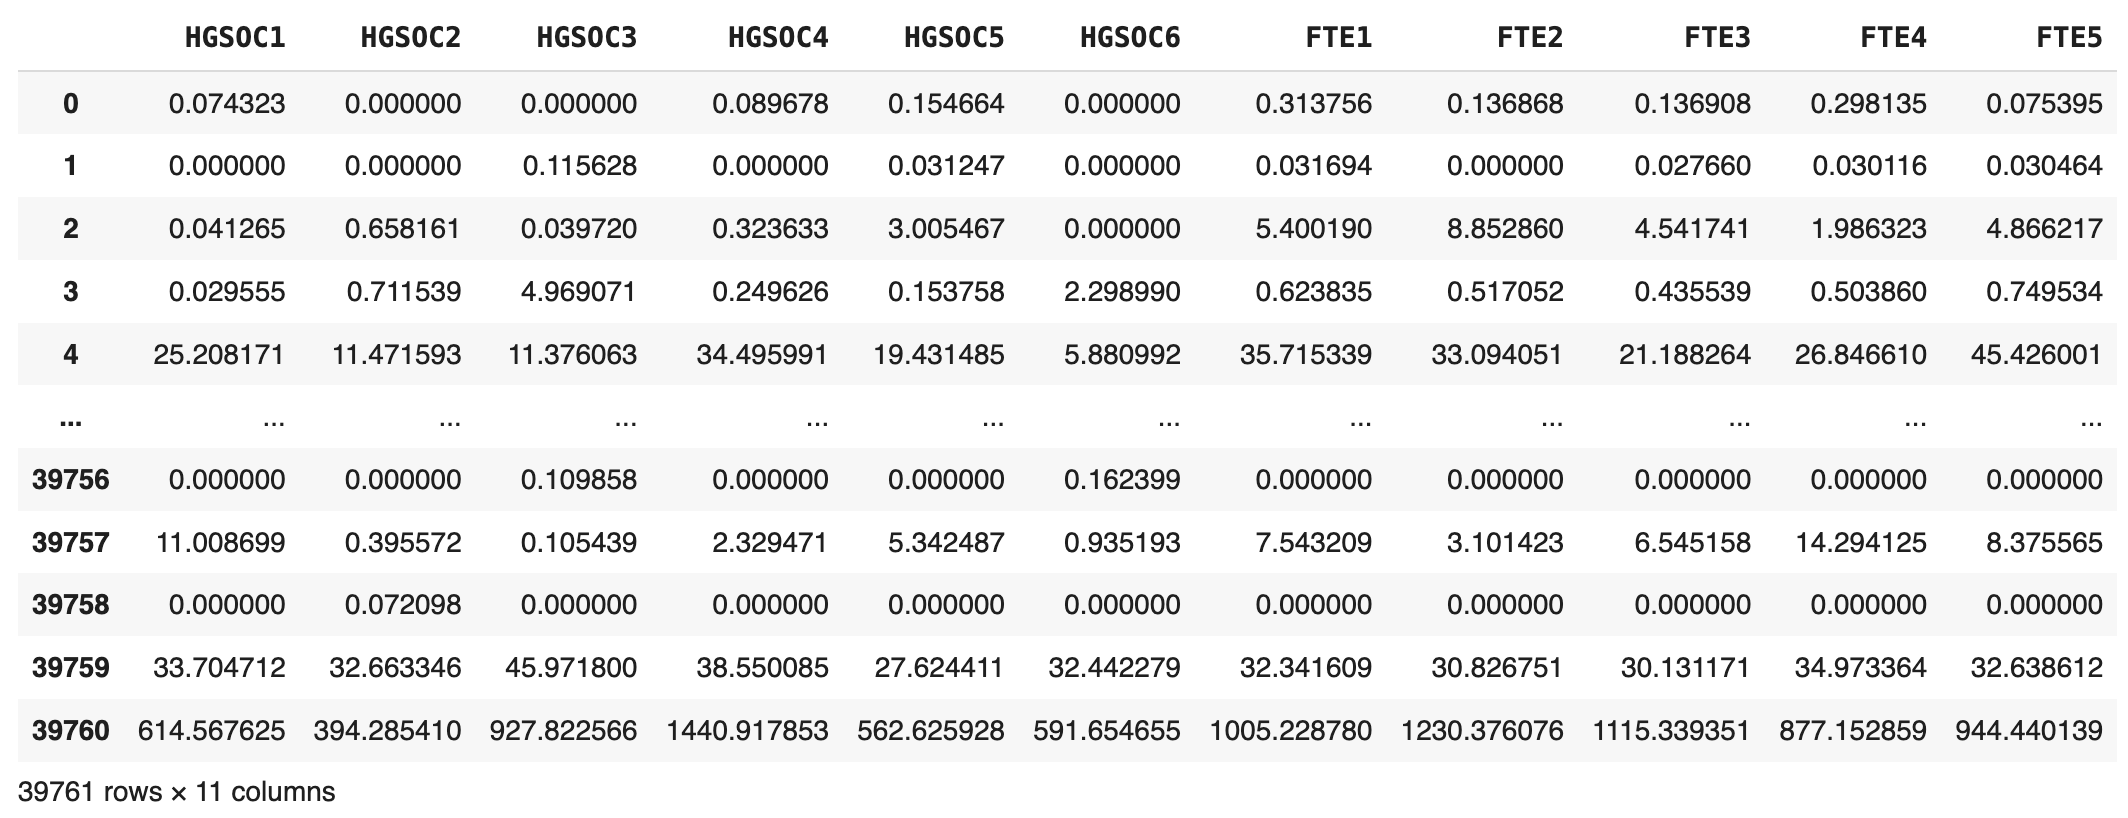

In [15]:
sample=gene[["HGSOC1"]].astype(float)

In [11]:
iteration=len(sample)

Step 2: Set the value of 5 parameters, time step and changes of reactions.

In [9]:
step= 500
Kon = 85
Koff = 30
psi = 4000
degradation_rates = np.random.lognormal(mean=-0.44, sigma=0.92, size=step)
transcription_rates = np.random.lognormal(mean=0.37, sigma=2.05, size=step)
s=transcription_rates*(Kon+Koff)/(Kon*psi)
intial_I = 0.001
c1=np.random.lognormal(mean=-6.41, sigma=0.61, size=step)
c2=np.random.lognormal(mean=-3.89, sigma=1.78, size=step)
d=np.random.lognormal(mean=1.68, sigma=1.74, size=step)
a=np.random.lognormal(mean=0.53, sigma=0.47, size=step)




In [17]:
gene1=[]
gene2=[]

Step 3: import only 1 sample to the model and run the model twice, and then save the results as gene1 and gene2.

In [18]:

for j in range(iteration):



    A = 0
    I = intial_I
    X = sample[j]

    t_values = [0]
    A_values = [A]
    I_values = [I]
    X_values = [X]


    for i in range(step):

        R = np.array([Koff * A_values[i], Kon * I_values[i],psi * s[i] * A_values[i], degradation_rates[i] * X_values[i]])
        total_rate = np.sum(R)

        tau = 1/total_rate * np.log(1/np.random.random())
        t_values.append(t_values[-1] + tau)

        reaction = np.random.choice([0, 1, 2, 3], p=R / total_rate)

        if reaction == 0:
            A -= d[i]
            I += d[i]
        elif reaction == 1:
            A += a[i]
            I -= a[i]
        elif reaction == 2:
            X += c1[i]
        elif reaction == 3:
            X -= c2[i]

        A_values.append(A)
        I_values.append(I)
        X_values.append(X)

        if X_values[-1]< 0:
            X_values[-1]=0


        if A_values[-1]< 0:
            A_values[-1]=0

        if I_values[-1]< 0:
            I_values[-1]=0




    gene1.append([X_values[-1]])

In [19]:

for j in range(iteration):



    A = 0
    I = intial_I
    X = sample[j]

    t_values = [0]
    A_values = [A]
    I_values = [I]
    X_values = [X]


    for i in range(step):

        R = np.array([Koff * A_values[i], Kon * I_values[i],psi * s[i] * A_values[i], degradation_rates[i] * X_values[i]])
        total_rate = np.sum(R)

        tau = 1/total_rate * np.log(1/np.random.random())
        t_values.append(t_values[-1] + tau)

        reaction = np.random.choice([0, 1, 2, 3], p=R / total_rate)

        if reaction == 0:
            A -= d[i]
            I += d[i]
        elif reaction == 1:
            A += a[i]
            I -= a[i]
        elif reaction == 2:
            X += c1[i]
        elif reaction == 3:
            X -= c2[i]

        A_values.append(A)
        I_values.append(I)
        X_values.append(X)

        if X_values[-1]< 0:
            X_values[-1]=0


        if A_values[-1]< 0:
            A_values[-1]=0

        if I_values[-1]< 0:
            I_values[-1]=0




    gene2.append([X_values[-1]])

Step 4: save the gene1 and gene2 in csv files and download for further analysis.

In [22]:
npgene1=pd.DataFrame(gene1)
npgene2=pd.DataFrame(gene2)

In [23]:
npgene1.to_csv('/content/drive/My Drive/FTE1A.csv', index=False)
npgene2.to_csv('/content/drive/My Drive/FTE1B.csv', index=False)